In [1]:
x=1

In [6]:
import scanpy as sc
import scib
import pandas as pd

In [4]:
adata_rna = sc.read('data/rna_test.h5ad')
adata_rna

AnnData object with n_obs × n_vars = 16311 × 2000
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train', 'split', 'group', 'size_factors', '_scvi_batch'
    var: 'modality'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'batch_colors', 'cell_type_colors', 'modality_lengths', 'neighbors', 'pca', 'umap'
    obsm: 'X_multiMIL', 'X_pca', 'X_umap', '_scvi_extra_categorical_covs', 'imputed_modality_0', 'imputed_modality_1'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [5]:
adata_rna_adt = sc.read('data/rna_imputed_adt_test.h5ad')
adata_rna_adt

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/scib/lib/python3.10/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 16311 × 100
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train', 'split', 'group', 'size_factors', '_scvi_batch'
    var: 'mean', 'std'
    uns: 'batch_colors', 'cell_type_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [9]:
def calc_scib_bio(adata, label_key, batch_key, save_prefix):
    metrics_df = {}
    print('optimal res')
    scib.metrics.cluster_optimal_resolution(
            adata,
            label_key=label_key,
            cluster_key='cluster',
            use_rep='X_pca',
        )
    print('ari')
    metrics_df['ARI'] = scib.metrics.ari(adata, cluster_key='cluster', label_key=label_key)
    print('nmi')
    metrics_df['NMI'] = scib.metrics.nmi(adata, cluster_key='cluster', label_key=label_key)
    print('iso label asw')
    metrics_df['Isolated label score ASW'] = scib.metrics.isolated_labels_asw(
            adata, 
            label_key = label_key, 
            batch_key = batch_key, 
            embed = 'X_pca',
        )
    print('label asw')
    metrics_df['Label ASW'] = scib.metrics.silhouette(
            adata,
            label_key = label_key,
            embed = 'X_pca',
        )
    metrics_df = pd.DataFrame.from_dict(metrics_df, orient='index').T
    metrics_df.to_csv(f'data/{save_prefix}_scib.csv')
    return metrics_df

In [10]:
calc_scib_bio(adata_rna, 'cell_type', 'Site', 'rna')

optimal res
Compute neighbors on rep X_pca


/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/scib/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/scib/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numb

resolution: 0.1, nmi: 0.40217128732526014
resolution: 0.2, nmi: 0.4610956468335538
resolution: 0.3, nmi: 0.5123052568505697
resolution: 0.4, nmi: 0.6168900961851799
resolution: 0.5, nmi: 0.6185099034375062
resolution: 0.6, nmi: 0.6375330153526179
resolution: 0.7, nmi: 0.636849738551705
resolution: 0.8, nmi: 0.6382967204864336
resolution: 0.9, nmi: 0.6260504805249003
resolution: 1.0, nmi: 0.6270031748699694
resolution: 1.1, nmi: 0.6158506649045351
resolution: 1.2, nmi: 0.6192075537145854
resolution: 1.3, nmi: 0.613336707229912
resolution: 1.4, nmi: 0.6038627618147713
resolution: 1.5, nmi: 0.5851578651892505
resolution: 1.6, nmi: 0.5870842226756479
resolution: 1.7, nmi: 0.5677183621219855
resolution: 1.8, nmi: 0.5656447821014794
resolution: 1.9, nmi: 0.5694043936177062
resolution: 2.0, nmi: 0.5632534148993832
optimised clustering against cell_type
optimal cluster resolution: 0.8
optimal score: 0.6382967204864336
ari
nmi
iso label asw
isolated labels: no more than 1 batches per label
B1 B

,ARI,NMI,Isolated label score ASW,Label ASW
0,0.430066,0.638297,0.437847,0.450256


In [11]:
calc_scib_bio(adata_rna_adt, 'cell_type', 'Site', 'rna_adt')

optimal res
Compute neighbors on rep X_pca
resolution: 0.1, nmi: 0.6390950749805533
resolution: 0.2, nmi: 0.6860503544056233
resolution: 0.3, nmi: 0.7102328037808016
resolution: 0.4, nmi: 0.713122053175453
resolution: 0.5, nmi: 0.7364287033056295
resolution: 0.6, nmi: 0.7351088955192667
resolution: 0.7, nmi: 0.7391229769409786
resolution: 0.8, nmi: 0.7409289862043937
resolution: 0.9, nmi: 0.7400828273312824
resolution: 1.0, nmi: 0.743198542660816
resolution: 1.1, nmi: 0.7513175572723918
resolution: 1.2, nmi: 0.7489268704165555
resolution: 1.3, nmi: 0.7534550613466326
resolution: 1.4, nmi: 0.7450184268323476
resolution: 1.5, nmi: 0.7436514383921544
resolution: 1.6, nmi: 0.7366474480817844
resolution: 1.7, nmi: 0.7320080304192006
resolution: 1.8, nmi: 0.7251407955788208
resolution: 1.9, nmi: 0.7172884709103887
resolution: 2.0, nmi: 0.7183444713278079
optimised clustering against cell_type
optimal cluster resolution: 1.3
optimal score: 0.7534550613466326
ari
nmi
iso label asw
isolated lab

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/scib/lib/python3.10/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


B1 B IGKC+: 0.4741788040846586
B1 B IGKC-: 0.45553434267640114
CD4+ T CD314+ CD45RA+: 0.47943934611976147
CD4+ T activated: 0.4597260504961014
CD4+ T activated integrinB7+: 0.46860217303037643
CD4+ T naive: 0.518356341868639
CD8+ T CD49f+: 0.4641518369317055
CD8+ T CD57+ CD45RA+: 0.4818329159170389
CD8+ T CD57+ CD45RO+: 0.5015910068759695
CD8+ T CD69+ CD45RA+: 0.478976609185338
CD8+ T CD69+ CD45RO+: 0.5058642197400331
CD8+ T TIGIT+ CD45RA+: 0.44211797416210175
CD8+ T TIGIT+ CD45RO+: 0.49330122163519263
CD8+ T naive: 0.5298582464456558
CD8+ T naive CD127+ CD26- CD101-: 0.46455613896250725
CD14+ Mono: 0.42415665835142136
CD16+ Mono: 0.5094956057146192
Erythroblast: 0.49676944175735116
G/M prog: 0.4498031549155712
HSC: 0.5004907846450806
ILC: 0.6431509107351303
ILC1: 0.48621919844299555
Lymph prog: 0.4815163239836693
MAIT: 0.5024184291251004
MK/E prog: 0.5017703083576635
NK: 0.48680377285927534
NK CD158e1+: 0.44642455875873566
Naive CD20+ B IGKC+: 0.4928218238055706
Naive CD20+ B IGKC-: 0

,ARI,NMI,Isolated label score ASW,Label ASW
0,0.647761,0.753455,0.498968,0.514313


In [1]:
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
df = pd.DataFrame({'NMI': [0.753455, 0.638297], 'ARI': [0.647761, 0.430066], 'Label ASW': [0.514313, 0.450256]}, index=['RNA + imputed ADT', 'RNA'])
df

,NMI,ARI,Label ASW
RNA + imputed ADT,0.753455,0.647761,0.514313
RNA,0.638297,0.430066,0.450256


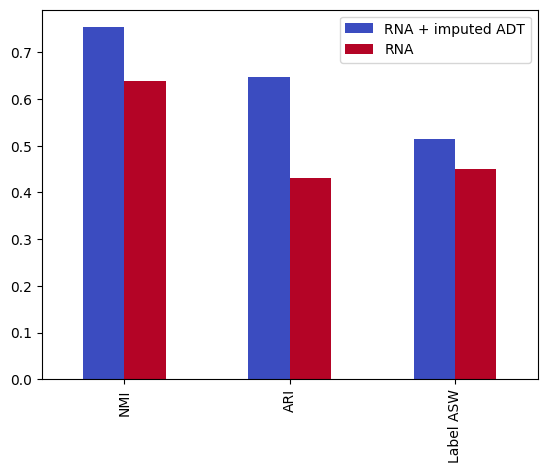

In [3]:
# plot and save as svg
df.T.plot(kind='bar', colormap='coolwarm')
plt.savefig('figures/scib_bio_metrics_rna_vs_rna_imputed_adt.svg', bbox_inches='tight')